# Matplotlib 한글 폰트 사용하기

* mat + plot + lib는 파이썬 시각화 라이브러리
* Seaborn은 파이썬에서 데이터 시각화 모듈
* Seaborn은 pandas 데이터 구조 사용하며 Matplotlib의 확장판

# 필요한 패키지를 가져옵니다

In [76]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

# 그래프에서 부호 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위해 임의의 데이터를 만들어 줍니다 

In [77]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -73,  -88, -182,  -91, -159, -201, -207, -207, -255, -292, -369,
       -460, -555, -562, -596, -666, -610, -597, -691, -604, -594, -670,
       -629, -551, -494, -517, -578, -607, -631, -637, -607, -661, -618,
       -540, -629, -700, -728, -693, -733, -778, -805, -733, -779, -739,
       -798, -743, -800, -876, -913, -839], dtype=int32)

In [78]:
len(data)

50

# 한글이 깨져 나온다

Text(0.5, 0, '시간(분)')

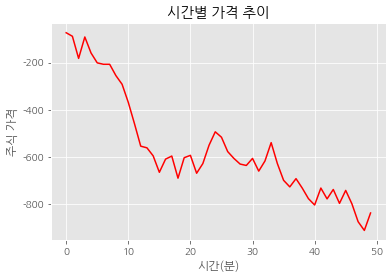

In [79]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

# 폰트를 설정해 주기에 앞서 (설치된) matplotlib의 버전과 위치정보를 가져온다

In [80]:
print('버전:', mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 위치', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전: 3.3.2
설치 위치: C:\Users\COM\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치 C:\Users\COM\.matplotlib
캐시 위치: C:\Users\COM\.matplotlib


# 터미널을 이용하여 설정 위치로 이동 후, fontlist.json을 확인

In [81]:
print('설정파일 위치:', mpl.matplotlib_fname())

설정파일 위치: C:\Users\COM\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


# 설치된 폰트를 찍어 봅니다

In [82]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 전체 개수
print(len(font_list))

801


In [83]:
# 상위 10개만 출력

font_list[:10]

['C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf',
 'C:\\Windows\\Fonts\\CALISTBI.TTF',
 'C:\\WINDOWS\\Fonts\\BOD_CR.TTF',
 'C:\\WINDOWS\\Fonts\\TEMPSITC.TTF',
 'C:\\WINDOWS\\Fonts\\PERTIBD.TTF',
 'C:\\WINDOWS\\Fonts\\RAGE.TTF',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\WINDOWS\\Fonts\\CALISTBI.TTF',
 'C:\\WINDOWS\\Fonts\\HANDotumB.ttf',
 'C:\\WINDOWS\\Fonts\\H2PORL.TTF']

In [84]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

# 폰트명 10개만 출력
f[:10]

801


['cmmi10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif']

# 나눔고딕을 사용할 예정이기 때문에 'Nanum'이 들어간 폰트만 확인해 본다 

폰트를 설치했는데 원하는 폰트명을 가져오지 못 할때 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시위치로 이동해서 캐시파일을 열어봅니다
캐시파일에 원하는 폰트 리스트가 없으면 주피터 노트북 혹은 아나콘다를 재실행 해 줍니다. 

In [85]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf')]

# 폰트 사용하는 3가지 방법 

## FontProperties를 사용하는 방법

1. 한글 폰트가 필요한 항목마다 지정해야 한다

  1) matplotlib.pyplot
   - title()
   - xlabel()
   - ylabel()
   - legend()
   - text()
   
  2) matplotlib.axes
   - set_title()

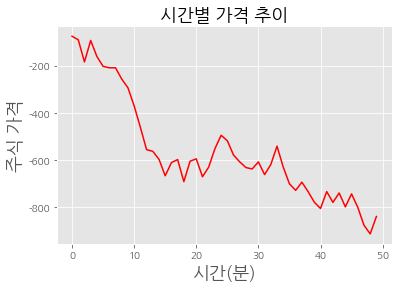

In [86]:
# 사용하고자 하는 폰트 경로 (f.name 옵션으로 확인, #8) 를 직접 입력 
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 항목마다 각각 지정 
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

## matplotlib.rcParams[]으로 전역 글꼴 설정 방법 

  * 그래프에 설정해 주면 폰트가 필요한 항목에 적용됨

In [87]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('설정되어 있는 폰트 사이즈: ', plt.rcParams['font.size'])
print('설정되어 있는 폰트 글꼴: ', plt.rcParams['font.family'])

설정되어 있는 폰트 사이즈:  10.0
설정되어 있는 폰트 글꼴:  ['NanumGothic']


In [88]:
# serif, sans-serif, monospace
print('serif (삐침)가 있는 폰트 --------')
print(plt.rcParams['font.serif'])
print('serif가 없는 sans-serif 폰트 ------')
print(plt.rcParams['font.sans-serif'])
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif (삐침)가 있는 폰트 --------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
serif가 없는 sans-serif 폰트 ------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [89]:
# rc.Params로 글꼴 설정
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

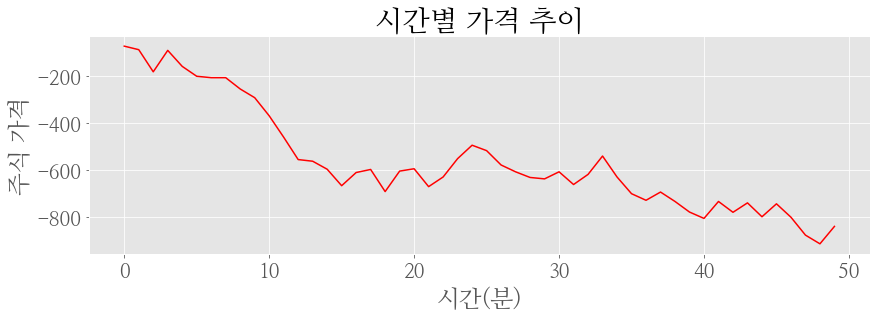

In [90]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### rcParams 대신 FontProperties와 plt.rc를 사용하는 방법

NanumGothic


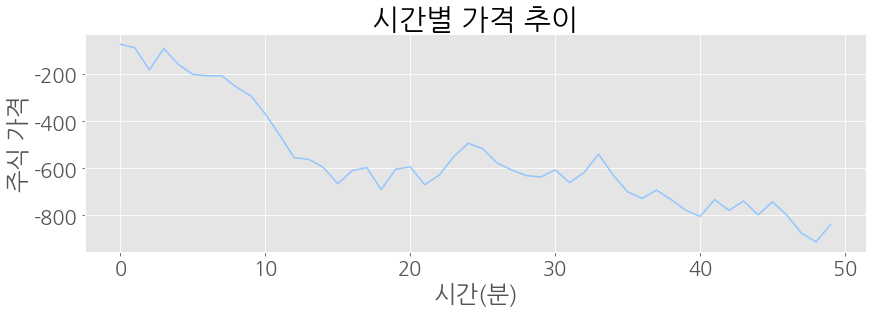

In [91]:
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

## rcParams를 설정파일에 직접 적어 주는 방법 

  * 노트북을 열때마다 지정해 주지 않아도 됨
  * 

In [92]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\COM\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


* 터미널을 이용해 설정 파일로 가서 사용하고자 하는 폰트의 주석을 풀어 준다 

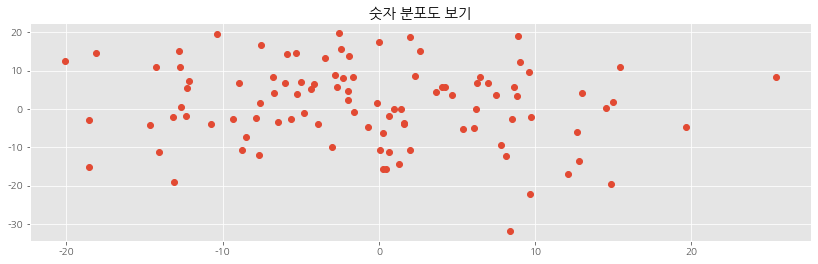

In [93]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()

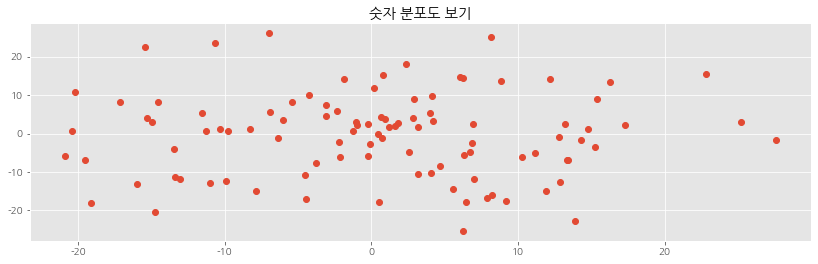

In [94]:
# 부호 마이너스 깨짐 

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()